# Riemann problems for linear systems

Illustrates drawing plots in the x-t plane.
Sample code for AMath 574, Winter 2017.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The next line forces use of print() as a function in Python 2, so that this notebook should work with either Python 2 or Python 3:

In [7]:
from __future__ import print_function

The eig function should be loaded as part of pylab.  If you change the cell below to `eig?` and re-execute, then the doc string for `eig` will be displaced showing how it is used.

In [51]:
eig

<function numpy.linalg.linalg.eig>

Set up a test matrix:

In [52]:
A = array([[2.,2],[0,-3]])
print("A = ")
print(A)

A = 
[[ 2.  2.]
 [ 0. -3.]]


Compute the eigenvalues and eigenvectors:

In [47]:
s,R = eig(A)
print("Eigenvalues: ")
print(s)
print("Eigenvector matrix:")
print(R)

Eigenvalues: 
[ 2. -3.]
Eigenvector matrix:
[[ 1.         -0.37139068]
 [ 0.          0.92847669]]


Note that the eigenvalues are not necessarily in increasing order, so let's sort them:

In [48]:
j = argsort(s)  # returns the indices in the order needed (0-based Python)
print(j)

[1 0]


In [49]:
s = s[j]  # reorder s
print(s)

[-3.  2.]


In [50]:
R = R[:,j]  # reorder columns of R:
print(R)

[[-0.37139068  1.        ]
 [ 0.92847669  0.        ]]


## Set up and solve a Riemann problem:

In [36]:
q_left = array([1,1])
q_right = array([0,3])
delta_q = q_right - q_left

In [37]:
alpha = solve(R, delta_q)
print(alpha)

[-0.2         2.15406592]


In [38]:
q_m = q_left + alpha[0]*R[:,0]
print("Middle state is q_m = \n %s" % q_m)

Middle state is q_m = 
 [ 0.8  1. ]


## Define a function to plot in the x-t plane:

In [39]:
def plot_xt_plane(s):
    tfinal = 1.
    xs = tfinal*s  # characteristics at final time
    xs_max = max(abs(xs))
    plot([-xs_max, xs_max],[0,0],'k')  # x-axis
    for i in range(len(s)):
        plot([0,xs[i]], [0,tfinal], 'b')
    xlabel('x')
    ylabel('time')
    title('Solution in x-t plane')

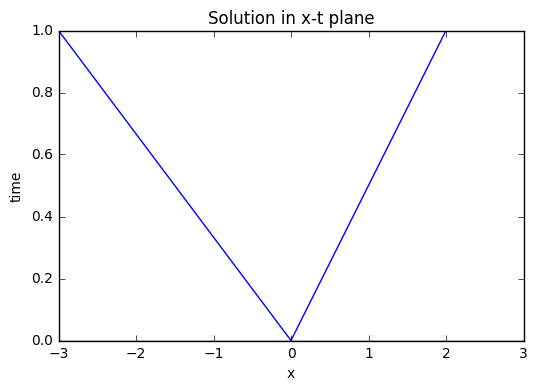

In [40]:
plot_xt_plane(s)

Note that everything above should also work for hyperbolic linear systems of $m$ equations, except that there will be more than one middle state. 